In [7]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,f1_score
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
train_gen = image_dataset_from_directory(directory="/kaggle/input/grape-dataset/Grape/Train",image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/kaggle/input/grape-dataset/Grape/Val",image_size=(256, 256))
val_gen = image_dataset_from_directory(directory="/kaggle/input/grape-dataset/Grape/Test",image_size=(256, 256))
rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))
val_gen  = val_gen.map(lambda image,label:(rescale(image),label))

Found 7222 files belonging to 4 classes.
Found 1623 files belonging to 4 classes.
Found 182 files belonging to 4 classes.


In [4]:
from tensorflow import keras

num_classes = 4

model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(num_classes,activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

In [5]:
# Compile the model using Nadam optimizer
model.compile(optimizer='nadam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_gen, epochs=50, validation_data=test_gen)

Epoch 1/50


2024-02-20 16:59:00.367135: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708448345.859395      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


226/226 [==============================] - 27s 81ms/step - loss: 0.5307 - accuracy: 0.7873 - val_loss: 0.2521 - val_accuracy: 0.9193
Epoch 2/50
226/226 [==============================] - 15s 67ms/step - loss: 0.1454 - accuracy: 0.9479 - val_loss: 0.1762 - val_accuracy: 0.9304
Epoch 3/50
226/226 [==============================] - 15s 67ms/step - loss: 0.0745 - accuracy: 0.9729 - val_loss: 0.0848 - val_accuracy: 0.9710
Epoch 4/50
226/226 [==============================] - 15s 67ms/step - loss: 0.0504 - accuracy: 0.9817 - val_loss: 0.0617 - val_accuracy: 0.9809
Epoch 5/50
226/226 [==============================] - 16s 68ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0651 - val_accuracy: 0.9827
Epoch 6/50
226/226 [==============================] - 16s 68ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.1402 - val_accuracy: 0.9532
Epoch 7/50
226/226 [==============================] - 16s 69ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0472 - val_accuracy: 0.9834
Epo

In [8]:
predictions = []
labels = []

for x, y in test_gen:
    labels.extend(y.numpy())  # Extend labels with the numpy array y
    predictions.append(tf.argmax(model.predict(x), axis=1).numpy())

# Calculate evaluation metrics
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, np.concatenate(predictions)) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, np.concatenate(predictions), average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, np.concatenate(predictions), average='micro') * 100))
print("F1-Score        : {:.2f} %".format(f1_score(labels, np.concatenate(predictions), average='micro') * 100))


1/1 [==============================] - 0s 54ms/step
Train Accuracy  : 100.00 %
Test Accuracy   : 99.57 %
Precision Score : 99.57 %
Recall Score    : 99.57 %
F1-Score        : 99.57 %


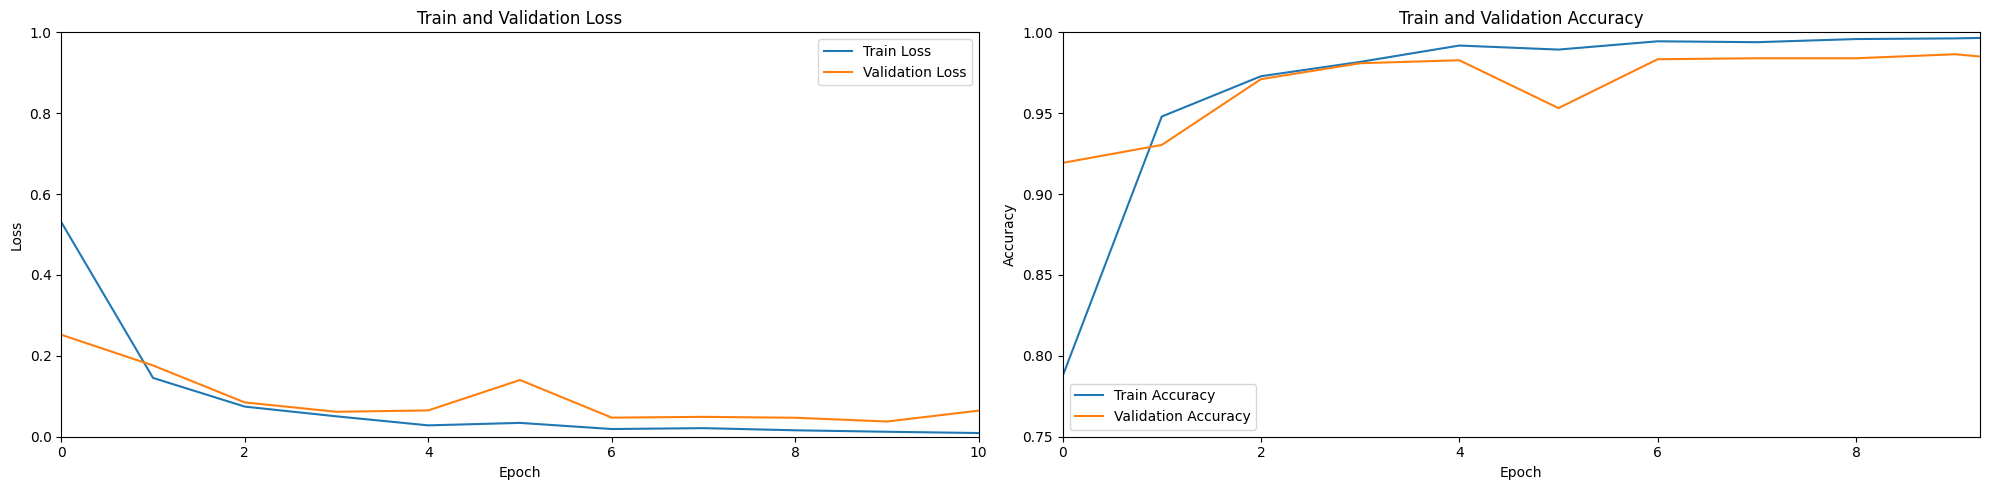

In [9]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

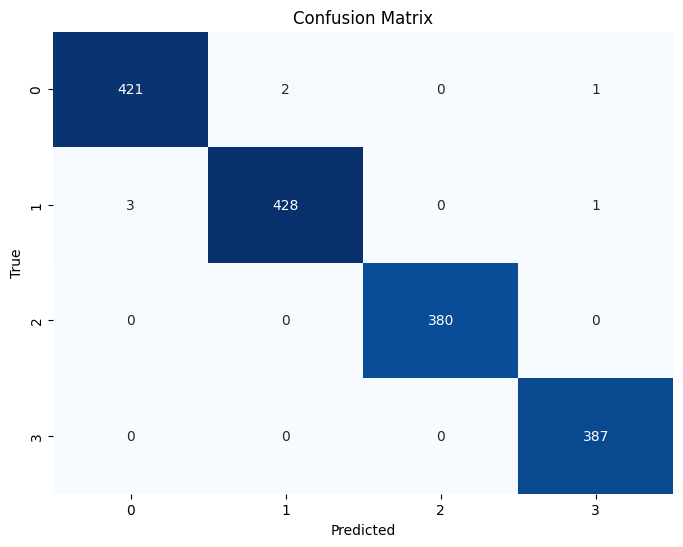

In [11]:
# Flatten the predictions list of lists into a single list
flat_predictions = [label for sublist in predictions for label in sublist]

# Calculate the confusion matrix
confusion_mat = confusion_matrix(labels, flat_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [12]:
model.save("base.h5")

1/1 [==============================] - 0s 86ms/step


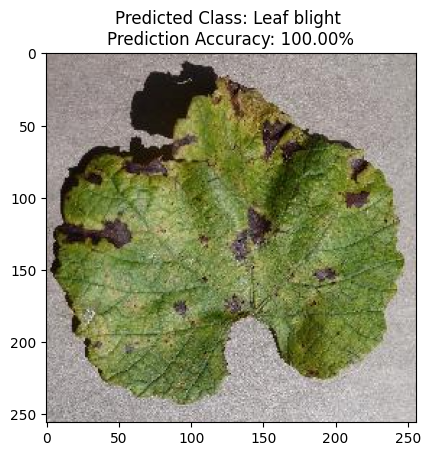

In [17]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the saved model
model = load_model("base.h5")

# Function to preprocess an image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Adjust target_size as per your model's input shape
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
    return img_array

# Path to the image you want to predict
image_path = "/kaggle/input/grape-dataset/Grape/Test/Leaf Blight/09d4e9db-7d08-432d-9d4e-c5365df0d5a4___FAM_L.Blight 4723.JPG"

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(processed_image)

# Assuming a classification task with softmax activation, get the class with the highest probability
predicted_class = np.argmax(predictions)
predicted_probability = np.max(predictions)

# Define your class labels (adjust according to your model)
class_labels = ["Black Rot", "Black Measles", "Healthy", "Leaf blight", ...]

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Predicted Class: {class_labels[predicted_class]} \nPrediction Accuracy: {predicted_probability:.2%}')
plt.show()
